<h2 align="center"> Logistic Regression </h2>

It is a classification problem in which the target variable has only 2 possible values.

 

You then went through the diabetes example in detail, wherein you tried to predict whether a person has diabetes or not based on that person’s blood sugar level.

 
A simple boundary decision approach does not work very well for this example. It would be too risky to decide the class blatantly on the basis of the cutoff because, especially in the middle, the patients could belong to any class — diabetic or non-diabetic.Hence, it is better to talk in terms of probability. One such curve which can model the probability of diabetes very well is the **sigmoid curve.**

<img src="Sigmoid.png" >

Its equation is given by the following expression:

**P=1/1+e−(β0+β1x)**

Then, you learnt that in order to find the best-fit sigmoid curve, you need to vary β0 and β1 until you get the combination of beta values that maximises the likelihood. For the diabetes example, the likelihood is given by the expression:
<br>**Likelihood= (1-P1).(1-P2).(1-P3).(1-P4).P5.(1-P6).P7.P8.P9.P10**<br>
To obtain the best fit Sigmoid curve the Likelihood needs to be as MAXIMUM as possible.<br>
This process, where the betas are varied until  the best fit curve for the probability is fund, is called logistic regression.

<img src="Likelihood.png">

There is a simpler way of interpreting the equation for logistic regression in the form of linearised equation.<br>
**Log Odds=ln(P/1-P)=β0+β1x**<br>
Basically, the odds of having diabetes (P/1-P), indicate how much likelier a person is to have diabetes than to not have it. For example, a person for whom the odds of having diabetes are equal to 3, is 3 times more likely to have diabetes than to not have it. In other words, P(Diabetes) = 3 * P(No diabetes).<br>
The odds vary with variation in x. Basically, **with every linear increase in x, the increase in odds is multiplicative**. For example, in the diabetes case, after every increase of 11.5 in the value of x, the odds are approximately doubled, i.e. they increase by a multiplicative factor of about 2.

<br><h2 align="center"> Telecom Churn Case Study</h2><br>
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [4]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated dataframe

In [7]:
# Merging on 'customerID'
df_1 = pd.merge(customer_data,churn_data, how='left', on='customerID')

In [8]:
# Final dataframe with all predictor variables
telecom = pd.merge( internet_data,df_1, how='left', on='customerID')
#print(telecom.shape)  
pd.set_option('display.max_columns',21) 

### Step 2: Inspecting the Dataframe

In [9]:
# Let's see the head of our master dataset
telecom.head()


,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [11]:
# let's look at the statistical aspects of the dataframe
telecom.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [12]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   MultipleLines     7043 non-null   object 
 2   InternetService   7043 non-null   object 
 3   OnlineSecurity    7043 non-null   object 
 4   OnlineBackup      7043 non-null   object 
 5   DeviceProtection  7043 non-null   object 
 6   TechSupport       7043 non-null   object 
 7   StreamingTV       7043 non-null   object 
 8   StreamingMovies   7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [13]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)
telecom[varlist].head()

,PhoneService,PaperlessBilling,Churn,Partner,Dependents
0,0,1,0,1,0
1,1,0,0,0,0
2,1,1,1,0,0
3,0,0,0,0,0
4,1,1,1,0,0


In [14]:
telecom.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,0,1,0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,0,0,0,34,1,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,0,0,0,2,1,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,0,0,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,0,0,0,2,1,Month-to-month,1,Electronic check,70.70,151.65,1


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [15]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [16]:
telecom.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,...,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,...,29.85,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,...,1889.5,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,...,108.15,1,0,0,0,0,1,1,0,0
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,...,1840.75,0,1,0,0,0,0,1,0,0
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,...,151.65,1,0,0,0,1,0,0,1,0


In [17]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [18]:
telecom.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,...,1,0,1,0,1,0,1,0,1,0



#### Dropping the repeated variables

In [19]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [20]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')


In [21]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [22]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [23]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99% 
# As the values grow steadyly from 75% to 90% to maximum so we conclude there is no outliers
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [24]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [25]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [26]:
# Checking percentage of missing values after removing the missing values
telecom['TotalCharges'].isnull().sum()

0

Now we don't have any missing values

### Step 4: Test-Train Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,...,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,0,0,...,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,1,0,...,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,151.65,0,0,...,1,0,1,0,1,0,1,0,1,0


In [29]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [30]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,...,0,1,0,1,1,0,1,0,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,...,1,0,0,1,0,1,0,1,0,1


In [33]:
### Checking the Churn Rate
churn = (telecom['Churn'].sum()/len(telecom['Churn']))*100
churn



26.578498293515356

We have almost 27% churn rate

Recall that, for continuous variables, Rahim scaled the variables to standardise the three continuous variables — tenure, monthly charges and total charges. Recall that scaling basically reduces the values in a column to within a certain range — in this case, we have converted the values to the Z-scores.

 

For example, let’s say that, for a particular customer, tenure = 72. After standardising, the value of scaled tenure becomes:


72
−
32.4
24.6
=
1.61

 

because for the variable tenure, mean(
μ
) = 32.4 and standard deviation(
σ
) = 24.6.

 

The variables had these ranges before standardisation:

Tenure = 1 to 72
Monthly charges = 18.25 to 118.80
Total charges = 18.8 to 8685
 

After standardisation, the ranges of the variables changed to:

Tenure = -1.28 to +1.61
Monthly charges = -1.55 to +1.79
Total charges = -0.99 to 2.83
Clearly, none of the variables will have a disproportionate effect on the model’s results now.

 

Churn Rate and Class Imbalance

Another thing to note here was the Churn Rate which Rahim talked about at the end of the video. You saw that the data has almost 27% churn rate. Checking the churn rate is important since you usually want your data to have a balance between the 0s and 1s (in this case churn and not-churn). 

 

The reason for having a balance is simple. Let’s do a simple thought experiment - if you had a data with, say, 95% not-churn (0) and just 5% churn (1), then even if you predict everything as 0, you would still get a model which is 95% accurate (though it is, of course, a bad model). This problem is called class-imbalance and you'll learn to solve such cases later.

 

Fortunately, in this case, we have about 27% churn rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.

### Step 6: Looking at Correlations

In [34]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

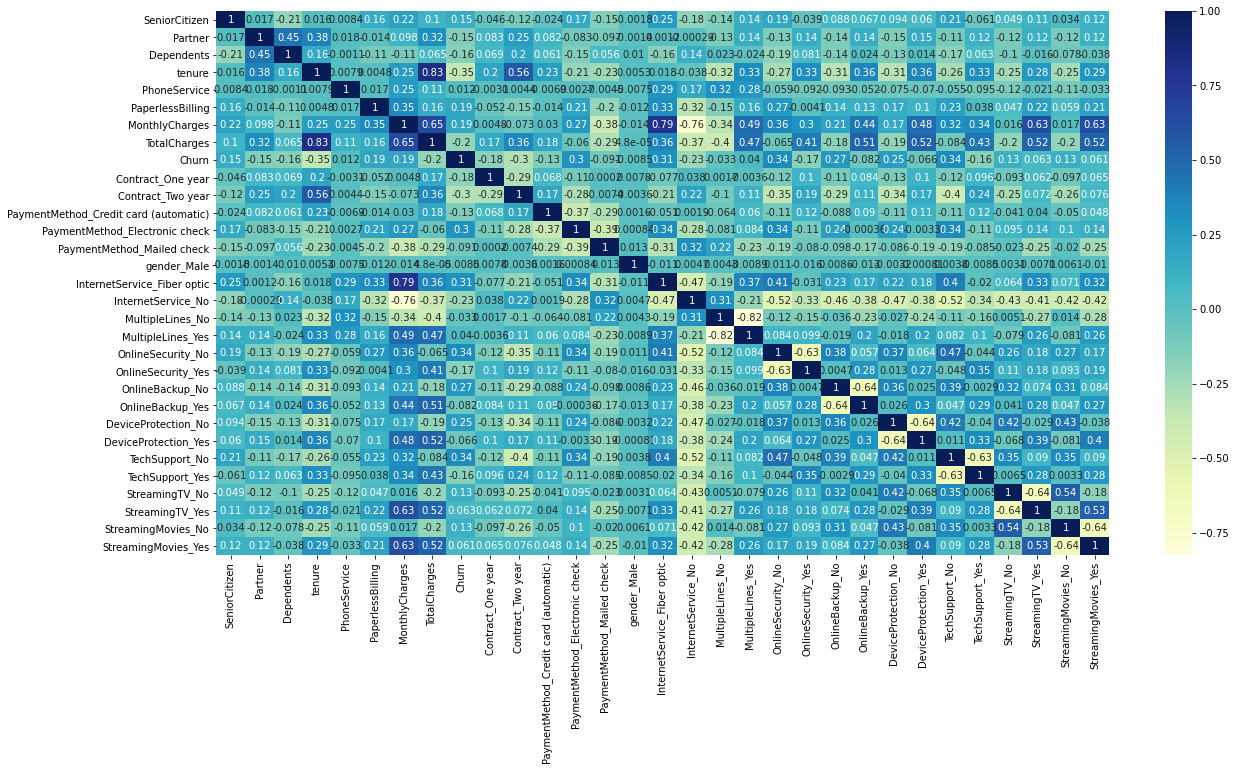

In [35]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True,cmap="YlGnBu")
plt.show()

#### Dropping highly correlated dummy variables

In [36]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

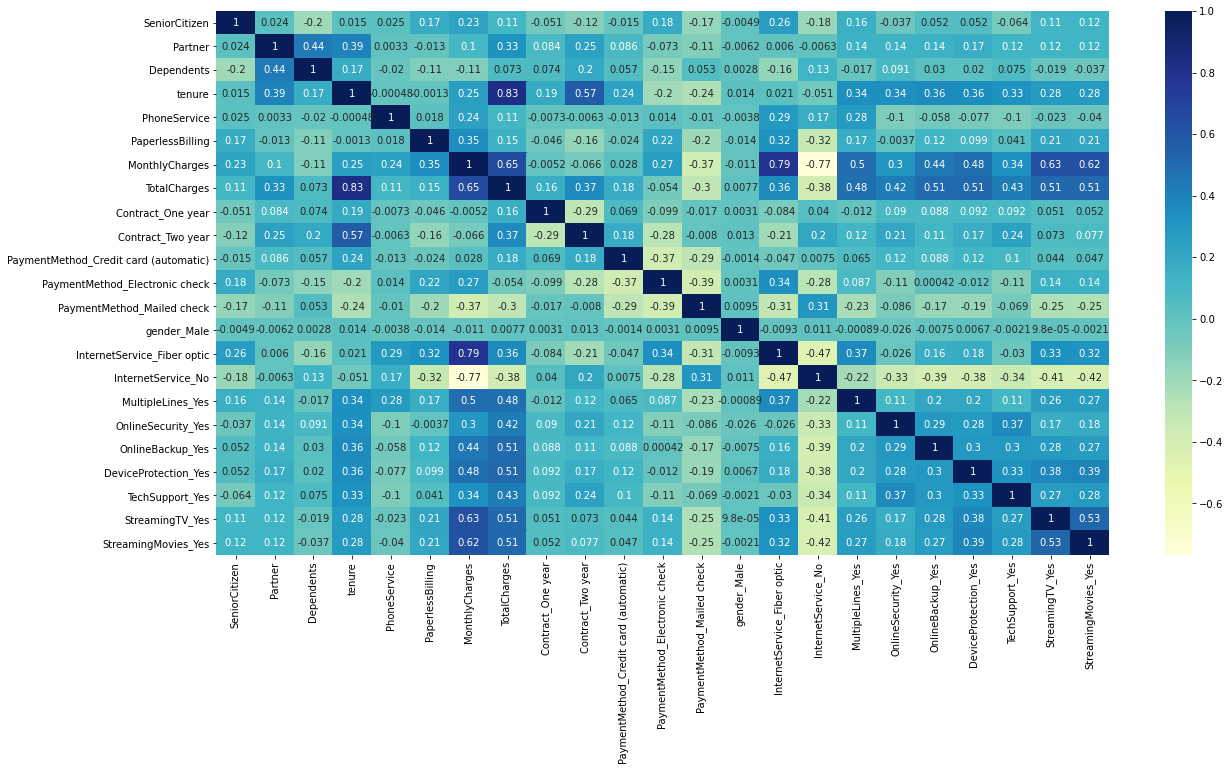

In [37]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True,cmap="YlGnBu")
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [38]:
import statsmodels.api as sm

In [39]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Wed, 12 Aug 2020   Deviance:                       4009.4
Time:                        10:38:59   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Step 8: Feature Selection Using RFE

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [41]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)                       # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [46]:
# The columns among all the 23 columns that has been shortisted to perform the analysis on  
col=X_train.columns[rfe.support_]
col

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [47]:
# The columns that are not been used to perform further analysis due to their high correlation with other features
X_train.columns[~rfe.support_]


Index(['Partner', 'Dependents', 'PhoneService',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [49]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()) #GLM (Generalized Linear Models
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Wed, 12 Aug 2020   Deviance:                       4022.2
Time:                        11:04:37   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
# Getting the predicted values on the train set
# Getting the probabilities of the customers to churn
y_train_pred = res.predict(X_train_sm)
y_train_pred.head(10)

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

#### Confusion Matrix

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# confusion matrix using crosstab
pd.crosstab(y_train_pred_final.Churn, y_train_pred_final.predicted, rownames=['Actual'], colnames=['Predicted'], margins=True)

#### Model accuracy 

In [ ]:
# Let's check the overall accuracy.
# Accuracy= correctly predicted values/Total number of labels
# here, Accuracy = (3275+713)/(3275+713+574+360)=81.02

print(str(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)*100)+'%')

##### Now to Improve the accuracy even more, we Go for fine tuning(ie feature elimination using VIF)

#### Checking VIFs

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [ ]:
col = col.drop('MonthlyCharges', 1)

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred[:10]

In [ ]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
print(str(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)*100)+'%')

So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

In [70]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [71]:
y_train_pred[:10]

array([0.22790197, 0.22864388, 0.67489226, 0.61586836, 0.66226032,
       0.41819928, 0.28813321, 0.7951366 , 0.17433167, 0.51908788])

In [72]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [73]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.227902,879,0
1,0,0.228644,5790,0
2,1,0.674892,6498,1
3,1,0.615868,880,1
4,1,0.662260,2784,1


In [74]:
# Let's check the overall accuracy.
print(str(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)*100)+'%')

80.57700121901667%


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
1,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
0,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [75]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3269  366]
 [ 590  697]]


In [77]:
# confusion matrix using crosstab
print(pd.crosstab(y_train_pred_final.Churn,y_train_pred_final.predicted,
            rownames=['Actual'], colnames=['Predicted'], margins=True))

Predicted     0     1   All
Actual                     
0          3269   366  3635
1           590   697  1287
All        3859  1063  4922


In [78]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8057700121901666

<br><h2 align="center">Metrics Beyond Accuracy: Sensitivity & Specificity</h2><br>

In the previous session, you built a logistic regression model and arrived at the final set of features using RFE and manual feature elimination. You got an accuracy of about 80.475% for the model. But the question now is - Is accuracy enough to assess the goodness of the model? As you'll see, the answer is a big 'NO!' 

**To understand why accuracy is often not the best metric, consider this business problem**

"Let’s say that increasing ‘churn’ is the most serious issue in the telecom company, and the company desperately wants to retain customers. To do that, the marketing head decides to roll out discounts and offers to all customers who are likely to churn - ideally, not a single ‘churn’ customer should be missed. Hence, it is important that the model identifies almost all the ‘churn’ customers correctly. It is fine if it incorrectly predicts some of the ‘non-churn’ customers as ‘churn’ since in that case, the worst that will happen is that the company will offer discounts to those customers who would anyway stay."

Let's take a look at the confusion matrix we got for our final model again - the actual labels are along the column while the predicted labels are along the rows (for e.g. 595 customers are actually 'churn' but predicted as 'not-churn'):
<img src="churn.png">

From the table above, you can see that there are 595 + 692  = 1287 actual ‘churn’ customers, so ideally the model should predict all of them as ‘churn’ (i.e. corresponding to the business problem above). But out of these 1287, the current model only predicts 692 as ‘churn’. Thus, only 692 out of 1287, or only about 53% of ‘churn’ customers, will be predicted by the model as ‘churn’. This is very risky - the company won’t be able to roll out offers to the rest 47% ‘churn’ customers and they could switch to a competitor!
 

So although the accuracy is about 80%, the model only predicts 53% of churn cases correctly.

 

In essence, what’s happening here is that you care more about one class (class='churn') than the other. This is a very common situation in classification problems - you almost always care more about one class than the other. On the other hand, the accuracy tells you model's performance on both classes combined - which is fine, but not the most important metric.

**Consider another example**<br>
suppose you're building a logistic regression model for cancer patients. Based on certain features, you need to predict whether the patient has cancer or not. In this case, if you incorrectly predict many diseased patients as 'Not having cancer', it can be very risky. In such cases, it is better that instead of looking at the overall accuracy, you care about predicting the 1's (the diseased) correctly. 

<img src="tntp.png">

In [82]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Let's see the sensitivity/True Positive Rate(TPR)
TP / float(TP+FN)

0.5415695415695416

In [87]:
# Let us calculate specificity
TN / float(TN+FP)

0.8993122420907841

In [88]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10068775790921596


In [89]:
# positive predictive value
print (TP / float(TP+FP))

0.6556914393226717


In [90]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8471106504275719


<h2 align="center"> ROC Curve</h2>

So far you have learned about some evaluation metrics and saw why they're important to evaluate a logistic regression model. Now, recall that the sensitivity that you got (~53.768%) was quite low and clearly needs to be dealt with. But what was the cause of such a low sensitivity in the first place?

 If you remember, when you assigned 0s and 1s to the customers after building the model, you arbitrarily chose a cut-off of 0.5 wherein if the probability of churning for a customer is greater than 0.5, you classified it as a 'Churn' and if the probability of churning for a customer is less than 0.5, you classified it as a 'Non-churn'. 

 Now, this cut-off was chosen at random and there was no particular logic behind it. So it might not be the ideal cut-off point for classification which is why we might be getting such a low sensitivity.

**For low values of threshold,a higher number of customers predicted as a 1 (Churn). So naturally, a lower cutoff would mean a higher number of customers being identified as 'Churn'. Similarly, for high values of threshold, you'd have a higher number of customer predicted as a 0 (Not-Churn) and a lower number of customers predicted as a 1 (Churn).**

<br> **ROC Curves shows the tradeoff between the True Positive Rate (TPR) and the False Positive Rate (FPR)**.<br>
And as was established from the formulas above, TPR and FPR are nothing but sensitivity and (1 - specificity), so it can also be looked at as a tradeoff between sensitivity and specificity.<br>


**Desirable Scenarion:**<br>
<u>True Positive Rate needs to be as high as possible</u> (cancer and non-cancer patients identified very well).<br>
<u>False Positive Rate needs to be as low as possible</u> (very less amount of people having cancer identified as no-cancer)

### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [13]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [14]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob,
                                         drop_intermediate = False )

NameError: name 'metrics' is not defined

In [ ]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

**Area Under the Curve**<br>

By determining the Area under the curve (AUC) of a ROC curve, you can determine how good the model is. If the ROC curve is more towards the upper-left corner of the graph, it means that the model is very good and if it is more towards the 45-degree diagonal, it means that the model is almost completely random. So, the larger the AUC, the better will be your model which is something you saw in the last segment as well.

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.614994  0.943279  0.498762
0.2   0.2  0.721861  0.846154  0.677854
0.3   0.3  0.770012  0.776224  0.767813
0.4   0.4  0.790532  0.636364  0.845117
0.5   0.5  0.806176  0.536131  0.901788
0.6   0.6  0.798050  0.380730  0.945805
0.7   0.7  0.776310  0.196581  0.981568
0.8   0.8  0.747867  0.041181  0.998074
0.9   0.9  0.738521  0.000000  1.000000


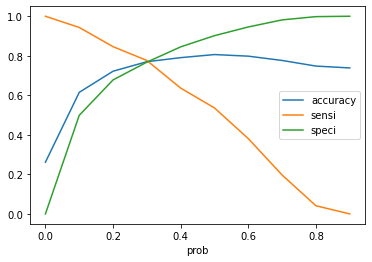

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7700121901665989

In [91]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2791,  844],
       [ 288,  999]], dtype=int64)

In [92]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [93]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7762237762237763

In [94]:
# Let us calculate specificity
TN / float(TN+FP)

0.7678129298486933

In [95]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23218707015130674


In [96]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5420510037981552


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9064631373822669


## Precision and Recall

In [ ]:
#Looking at the confusion matrix again

In [98]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3278,  357],
       [ 597,  690]], dtype=int64)

##### Precision: Probability that something predicted as YES is actually YES
TP / TP + FP

In [99]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6590257879656161

##### Recall
TP / TP + FN

In [106]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5361305361305362

Using sklearn utilities for the same

In [107]:
from sklearn.metrics import precision_score, recall_score

In [103]:
?precision_score

In [108]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6590257879656161

In [109]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5361305361305362

### Precision and recall tradeoff

In [110]:
from sklearn.metrics import precision_recall_curve

In [111]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [112]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

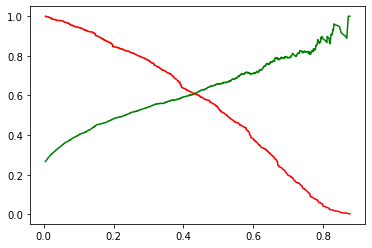

In [113]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [115]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [116]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-1.341319,1,0,0,0,1,0,1,0,0,0,0,1
3730,-1.286351,1,0,0,0,1,0,1,0,1,0,1,1
1761,-1.284686,1,0,0,1,1,0,0,1,1,0,0,0
2283,-1.379630,1,0,0,0,0,1,1,0,0,0,0,0
1872,-1.313003,0,0,0,1,0,0,0,1,0,0,0,0


In [117]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [118]:
y_test_pred = res.predict(X_test_sm)

In [119]:
y_test_pred[:10]

942     0.648571
3730    0.752059
1761    0.072410
2283    0.613676
1872    0.063482
1970    0.754552
2532    0.656019
1616    0.063245
2485    0.727653
5914    0.310118
dtype: float64

In [120]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [121]:
# Let's see the head
y_pred_1.head()

,0
942,0.648571
3730,0.752059
1761,0.072410
2283,0.613676
1872,0.063482


In [122]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [123]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [124]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [125]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [126]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.648571
1,1,3730,0.752059
2,0,1761,0.072410
3,1,2283,0.613676
4,0,1872,0.063482


In [127]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [128]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [130]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,942,0.648571
1,1,3730,0.752059
2,0,1761,0.072410
3,1,2283,0.613676
4,0,1872,0.063482


In [131]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [132]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,0,942,0.648571,1
1,1,3730,0.752059,1
2,0,1761,0.072410,0
3,1,2283,0.613676,1
4,0,1872,0.063482,0


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

In [133]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[930, 598],
       [109, 473]], dtype=int64)

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8127147766323024

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.6086387434554974

### Nuances of Logistic Regression

1.Cyclical or seasonal fluctuations in the business that need to be taken care of while building the samples. E.g. Diwali     sales, economic ups and downs, etc.<br>

2.The sample should be representative of the population on which the model will be applied in the future.<br>

3.For rare events samples, the sample should be balanced before it is used for modelling.

 

In [21]:
import pandas as pd 
df=pd.read_csv("loan.csv")
df.head()
list(df.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_